# 1. Import

In [102]:
# 1.1 Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Import dset
raw_data = pd.read_csv("https://archive.ics.uci.edu/static/public/186/data.csv")


# 2. Data Cleaning 

In [103]:
# 2.1 Create copy for d
data = raw_data.copy()

# 2.2 Check if there is any missing d
print("Number of missing values in data:\n", data.isnull().sum())
print("There is no missing values in data.")

# 2.3 Check if there is any duplicate data
print("Number of duplicated data records: ", data.duplicated().sum())
print("Duplicate Data: \n", data[data.duplicated()].sort_values(by='fixed_acidity'))


Number of missing values in data:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64
There is no missing values in data.
Number of duplicated data records:  1177
Duplicate Data: 
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6271            4.9             0.335         0.14             1.3      0.036   
5549            4.9             0.345         0.34             1.0      0.068   
2803            5.0             0.330         0.16             1.5      0.049   
2812            5.0             0.330         0.16             1.5      0.049   
6044            5.0             0.350         0.25             7.8      0.031   
...             ...              

By investigation, there is no missing values in data and 1177 duplicated data rows.

We observed that not all duplicate data are the same and the duplicated data are reasonable.

Therefore, we decided to keep the data unchanged

# 3. Exploratory Data Analysis
We would analysis the red and white wine data seperately and compare their difference first

After that, we would combine both datasets and perform analysis


In [104]:
# 3.1 Encode color of wine as binary variables: {"red": 0, "white": 1}
data['color'] = data['color'].map({"red": 0, "white": 1})

# 3.2 Seperate red and white wine data
red_wine_data = data[data['color']==0].copy()
white_wine_data = data[data['color']==1].copy()

# 3.3 Check the number of records for both red and white wine
print("The number of red wine data records is ", len(red_wine_data))
print("The number of white wine data records is ", len(white_wine_data))

The number of red wine data records is  1599
The number of white wine data records is  4898


In [105]:
# 3.4 Show the Summary Statistics
red_wine_summary = red_wine_data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for Red Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(red_wine_summary)
white_wine_summary = white_wine_data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for White Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(white_wine_summary)
wine_summary = data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(wine_summary)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [106]:
# 3.4 Use box plot to check if there is any outliers in features


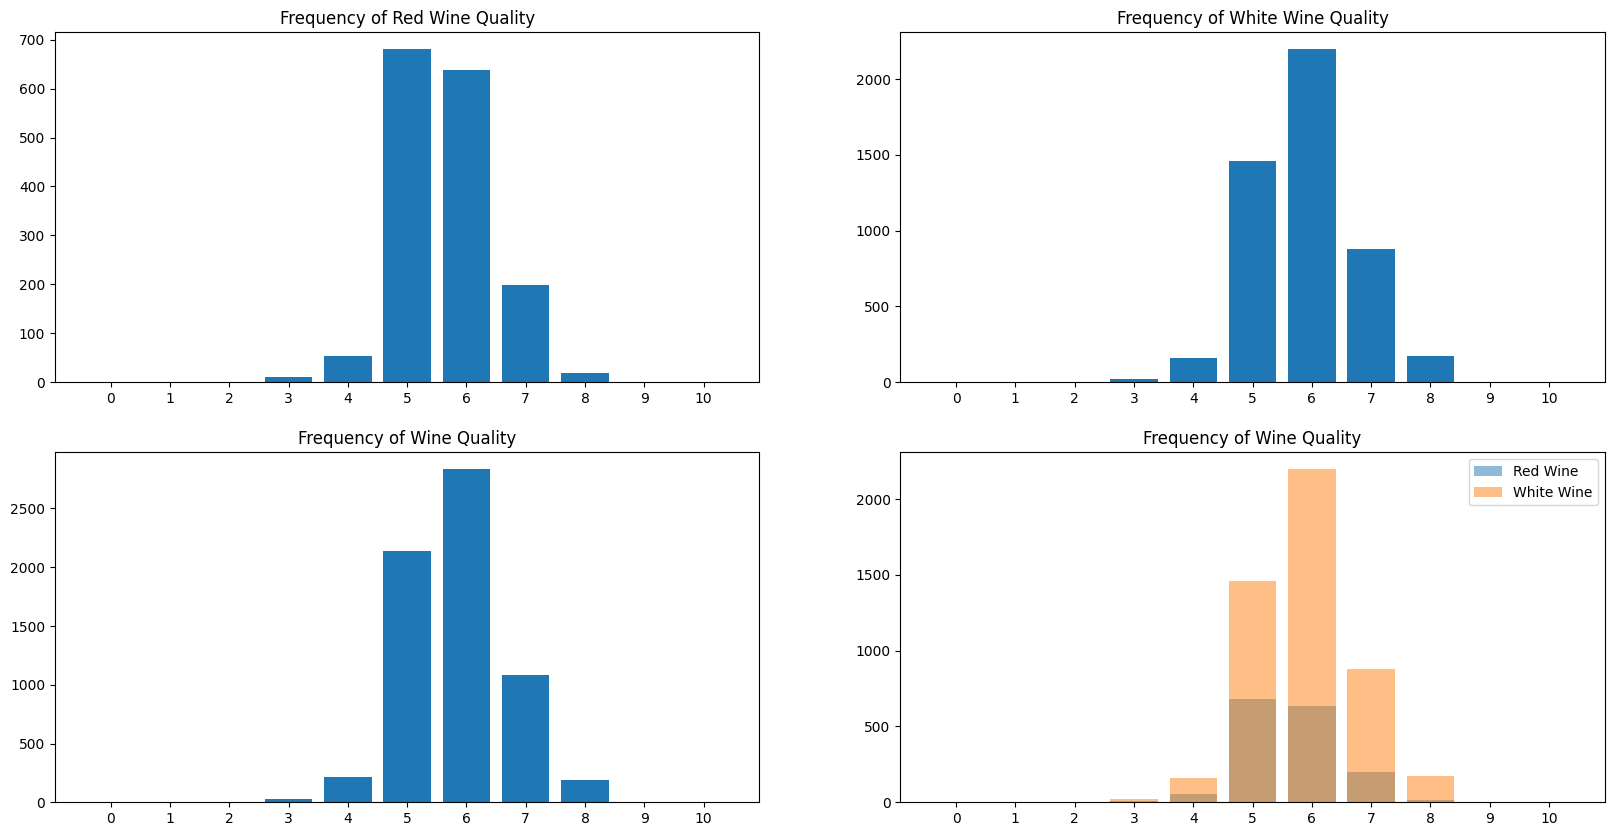

In [107]:
# 3.5 Use Histogram to check in distribution of wine quality
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# bins = np.arange(min(data['quality']), max(data['quality']) + 2) - 0.5
bins = np.arange(0, 10 + 2) - 0.5

# Red Wine
axes[0, 0].hist(red_wine_data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[0, 0].set_title('Frequency of Red Wine Quality')

# White Wine
axes[0, 1].hist(white_wine_data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[0, 1].set_title('Frequency of White Wine Quality')

# All Wine (Sum)
axes[1, 0].hist(data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[1, 0].set_title('Frequency of Wine Quality')

# Red Wine and White Wine on the same graph
axes[1, 1].hist(red_wine_data['quality'], bins=bins, align='mid', rwidth=0.8, alpha=0.5, label='Red Wine')
axes[1, 1].hist(white_wine_data['quality'], bins=bins, align='mid', rwidth=0.8, alpha=0.5, label='White Wine')
axes[1, 1].set_title('Frequency of Wine Quality')
axes[1, 1].legend(loc='upper right')

ticks = range(11)
plt.setp(axes, xticks=ticks)
plt.show()

By observation, the quality of wine range from 3 to 8 and mostly within 5 and 7. Also, the quality of white wine is generally higher than that of red wine. Therefore, we can conclude that the data is imbalanced and concentrated at 5-7.

In [ ]:
# Multivariate Analysis